In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, root_mean_squared_error

In [3]:
df=pd.read_csv('datasets/car_price.csv')

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.sample(5)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
3437,Honda City i DTEC E,4.28 Lakh,"1,33,384 kms",Diesel,Manual,1st Owner,2014,1582 cc,5 Seats
384,Mahindra XUV500 AT W10 FWD,14.45 Lakh,"73,986 kms",Diesel,Automatic,1st Owner,2017,2179 cc,7 Seats
2105,Honda Accord 2.4 Inspire M/T,4.25 Lakh,"64,000 kms",Petrol,Manual,1st Owner,2010,1497 cc,5 Seats
854,Mahindra Bolero Pik Up Extra Long FB 1.3T,8 Lakh,"60,000 kms",Diesel,Manual,1st Owner,2019,1197 cc,7 Seats
4833,Maruti Swift Vdi BSIII,1.52 Lakh,"1,50,112 kms",Diesel,Manual,5th Owner,2009,1197 cc,5 Seats


In [9]:
df['brand']=df['car_name'].str.split().str[0]

In [11]:
target=df['brand'].value_counts()[(df['brand'].value_counts()>100) & (df['brand'].value_counts()<1000)].index.tolist()

In [13]:
df=df[df['brand'].isin(target)]

In [15]:
df.shape

(2576, 10)

In [17]:
df['model']=df['car_name'].str.split().str[1]

In [20]:
counts=df['model'].value_counts()

In [22]:
target_model=counts[counts>50].index.tolist()

In [25]:
df=df[df['model'].isin(target_model)]

In [27]:
df.shape

(1046, 11)

In [29]:
df.drop(columns=['car_name'],inplace=True)

In [31]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand,model
1,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Duster
4,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Polo
5,7.66 Lakh,"49,719 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats,Volkswagen,Vento
6,7.58 Lakh,"43,688 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats,Volkswagen,Vento
8,6.99 Lakh,"21,429 kms",Petrol,Automatic,1st Owner,2015,1497 cc,5 Seats,Honda,City


In [33]:
rupees=df['car_prices_in_rupee'].str.split().str[0]

In [35]:
df['car_prices_in_rupee']=rupees.astype(float)*100000

In [37]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand,model
1,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Duster
4,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Polo
5,766000.0,"49,719 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats,Volkswagen,Vento
6,758000.0,"43,688 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats,Volkswagen,Vento
8,699000.0,"21,429 kms",Petrol,Automatic,1st Owner,2015,1497 cc,5 Seats,Honda,City


In [39]:
km_driven=df['kms_driven'].str.replace(',','',regex=False).str.split().str[0]

In [41]:
df['kms_driven'] = km_driven.astype(int)

In [43]:
df['engine']=df['engine'].str.split().str[0].astype(int)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

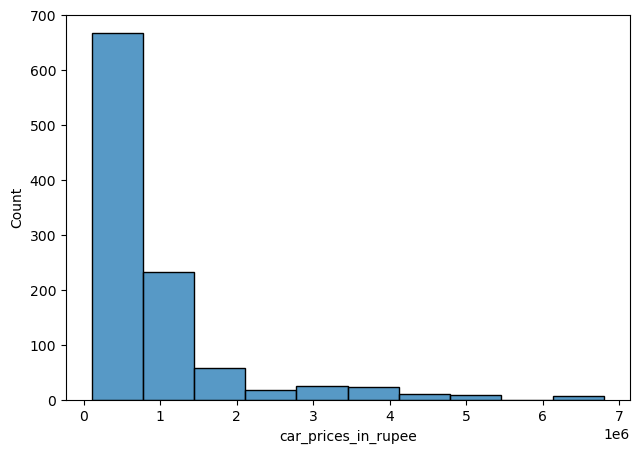

In [108]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['car_prices_in_rupee'],bins=10)
plt.show()

<Axes: ylabel='car_prices_in_rupee'>

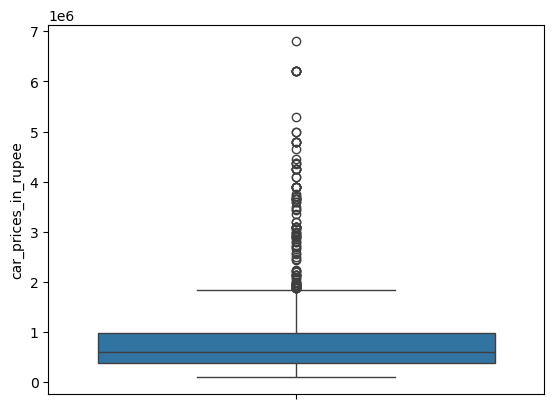

In [57]:
sns.boxplot(df['car_prices_in_rupee'])

In [77]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['car_prices_in_rupee']),df['car_prices_in_rupee'],test_size=0.2,random_state=42)

In [147]:
num=['kms_driven','manufacture','engine']
cat=['fuel_type','transmission','brand','model']
ord=['ownership','Seats']

In [160]:
handle_num=Pipeline(steps=[
    ('standardiz',StandardScaler())
])

handle_cat=Pipeline(steps=[
    ("encoding",OneHotEncoder())
                    
])
handle_ord=Pipeline(steps=[
    ('ordinal_encoding',OrdinalEncoder(categories=[['5th Owner','4th Owner','3rd Owner','2nd Owner','1st Owner','0th Owner'],['8 Seats', '7 Seats', '6 Seats', '5 Seats', '4 Seats', '2 Seats']]))
])

processor=ColumnTransformer(transformers=[
    ('std',handle_num,num),
    ('encode',handle_cat,cat),
    ('ord_encode',handle_ord,ord)
])

pipe=Pipeline(steps=[
    ('process',processor),
    ('regression',RandomForestRegressor())
])

In [163]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('std',
                                                  Pipeline(steps=[('standardiz',
                                                                   StandardScaler())]),
                                                  ['kms_driven', 'manufacture',
                                                   'engine']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['fuel_type', 'transmission',
                                                   'brand', 'model']),
                                                 ('ord_encode',
                                                  Pipeline(steps=[('ordinal_encoding',
                                                                   OrdinalEncoder(categories=[['5th '
                                                                                               'Owner',
                                                                                               '4th '
                                                                                               'Owner',
                                                                                               '3rd '
                                                                                               'Owner',
                                                                                               '2nd '
                                                                                               'Owner',
                                                                                               '1st '
                                                                                               'Owner',
                                                                                               '0th '
                                                                                               'Owner'],
                                                                                              ['8 '
                                                                                               'Seats',
                                                                                               '7 '
                                                                                               'Seats',
                                                                                               '6 '
                                                                                               'Seats',
                                                                                               '5 '
                                                                                               'Seats',
                                                                                               '4 '
                                                                                               'Seats',
                                                                                               '2 '
                                                                                               'Seats']]))]),
                                                  ['ownership', 'Seats'])])),
                ('regression', RandomForestRegressor())])

In [165]:
y_pred=pipe.predict(x_test)

In [167]:
print("r2_score: ",r2_score(y_test,y_pred))
print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("root mean squared error: ",root_mean_squared_error(y_test,y_pred))


r2_score:  0.9667903096652797
mean squared error:  33158667867.142857
mean absolute error:  107303.09523809524
root mean squared error:  182095.2164861638


## removing some of outlier

In [169]:
new_df=df[(df['car_prices_in_rupee']<max_limit) & (df['car_prices_in_rupee']>min_limit)]

In [171]:
print(df[(df['car_prices_in_rupee']<1000000)].shape)
print(df[(df['car_prices_in_rupee']>1000000)].shape)

(795, 10)
(243, 10)


In [173]:
max_limit=df['car_prices_in_rupee'].quantile(0.95)
min_limit=df['car_prices_in_rupee'].quantile(0.05)

In [175]:
x_train1,x_test1,y_train1,y_test1=train_test_split(new_df.drop(columns=['car_prices_in_rupee']),new_df['car_prices_in_rupee'],test_size=0.2,random_state=42)

In [177]:
pipe1=Pipeline(steps=[
    ('process',processor),
    ('regression',RandomForestRegressor())
])

In [179]:
pipe1.fit(x_train1,y_train1)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('std',
                                                  Pipeline(steps=[('standardiz',
                                                                   StandardScaler())]),
                                                  ['kms_driven', 'manufacture',
                                                   'engine']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['fuel_type', 'transmission',
                                                   'brand', 'model']),
                                                 ('ord_encode',
                                                  Pipeline(steps=[('ordinal_encoding',
                                                                   OrdinalEncoder(categories=[['5th '
                                                                                               'Owner',
                                                                                               '4th '
                                                                                               'Owner',
                                                                                               '3rd '
                                                                                               'Owner',
                                                                                               '2nd '
                                                                                               'Owner',
                                                                                               '1st '
                                                                                               'Owner',
                                                                                               '0th '
                                                                                               'Owner'],
                                                                                              ['8 '
                                                                                               'Seats',
                                                                                               '7 '
                                                                                               'Seats',
                                                                                               '6 '
                                                                                               'Seats',
                                                                                               '5 '
                                                                                               'Seats',
                                                                                               '4 '
                                                                                               'Seats',
                                                                                               '2 '
                                                                                               'Seats']]))]),
                                                  ['ownership', 'Seats'])])),
                ('regression', RandomForestRegressor())])

In [181]:
y_pred1=pipe1.predict(x_test1)

In [183]:
print("r2_score: ",r2_score(y_test1,y_pred1))
print("mean squared error: ",mean_squared_error(y_test1,y_pred1))
print("mean absolute error: ",mean_absolute_error(y_test1,y_pred1))
print("root mean squared error: ",root_mean_squared_error(y_test1,y_pred1))


r2_score:  0.9156792119020316
mean squared error:  24520416115.591396
mean absolute error:  104615.86021505376
root mean squared error:  156589.96173315644


In [100]:
print("r2_score: ",r2_score(y_test,y_pred))
print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("root mean squared error: ",root_mean_squared_error(y_test,y_pred))


r2_score:  0.8175364232292246
mean squared error:  182183244679.8701
mean absolute error:  289104.27995340334
root mean squared error:  426829.2921999029


<Axes: ylabel='car_prices_in_rupee'>

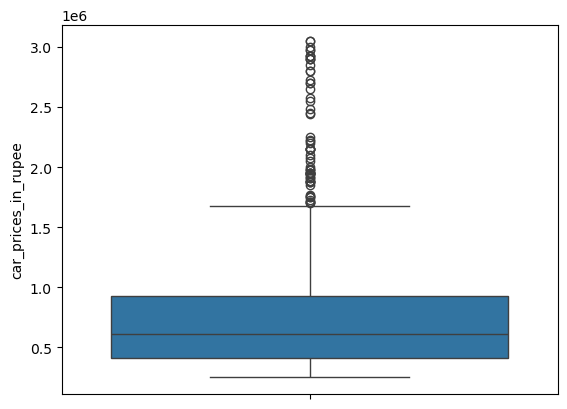

In [102]:
sns.boxplot(new_df['car_prices_in_rupee'])

In [120]:
from sklearn.model_selection import cross_val_score

In [193]:
cross_val_score(RandomForestRegressor(),processed_train,y_train,cv=10).tolist()

[0.95002830433469,
 0.9535526448434007,
 0.9685376866762602,
 0.8836561370130253,
 0.9643775674168245,
 0.9493112707860756,
 0.9682505738018718,
 0.9736039236069516,
 0.9622485638273209,
 0.970352367590252]

In [204]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand,model
1,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5 Seats,Renault,Duster
4,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5 Seats,Volkswagen,Polo
5,766000.0,49719,Petrol,Automatic,1st Owner,2017,1197,5 Seats,Volkswagen,Vento
6,758000.0,43688,Petrol,Automatic,1st Owner,2017,1197,5 Seats,Volkswagen,Vento
8,699000.0,21429,Petrol,Automatic,1st Owner,2015,1497,5 Seats,Honda,City


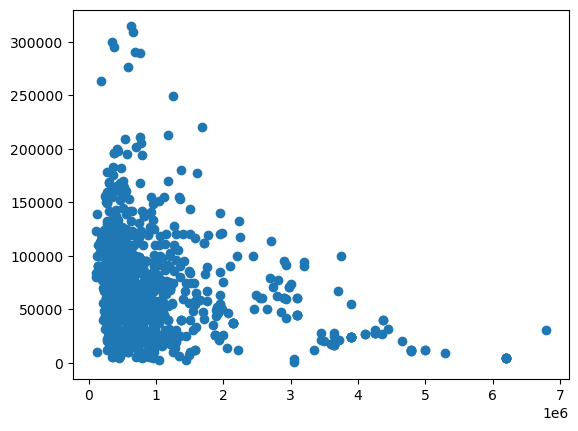

In [206]:
plt.scatter(df['car_prices_in_rupee'],df['kms_driven'])

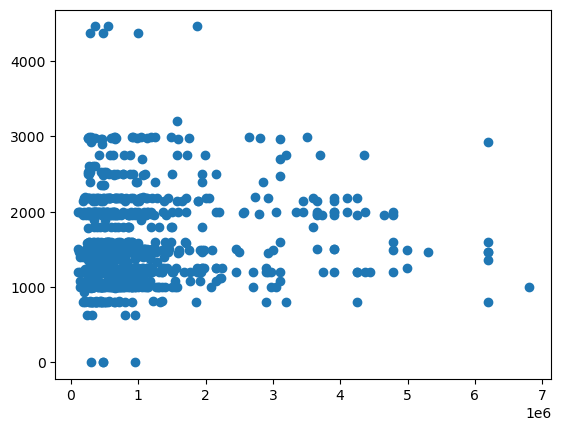

In [208]:
plt.scatter(df['car_prices_in_rupee'],df['engine'])

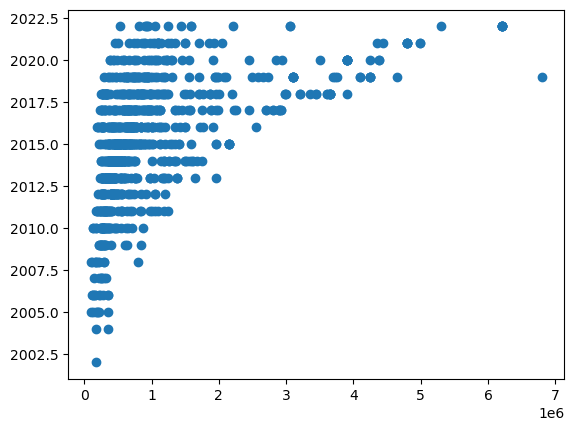

In [212]:
plt.scatter(df['car_prices_in_rupee'],df['manufacture'])